In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
import scipy as sp
import seaborn as sns

%matplotlib inline

In [2]:
# Read in data
df = pd.read_csv('/opt/dssg-hot/data/customer_survey/customer_survey_responses_405_2018.csv')

In [3]:
# Look at data
df.head(5)

,Response ID,Time Started,Date Submitted,Status,Legacy Comments,Comments,Language,Referer,Extended Referer,SessionID,...,I prefer to describe myself as:What is your gender?,"Do you identify as Hispanic, Latino, or Spanish?",How do you identify? (select just one),Some other race or combination of races (please specify)::How do you identify? (select just one),What is the primary language spoken at home?,Other (please specify)::What is the primary language spoken at home?,How many people are in your household (including you)?,What is your total annual pre-tax household income?,How could the express toll lanes be improved to meet your needs?,What do you like about the express toll lanes?
0,25,8/28/18 18:41,8/28/18 18:42,Partial,NaN,NaN,English,https://www.surveygizmo.com/s3/4537055/2018-40...,https://www.surveygizmo.com/s3/4537055/2018-40...,1535496107_5b85cfabce1104.15022245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26,8/28/18 18:43,8/28/18 18:43,Partial,NaN,NaN,English,https://www.surveygizmo.com/s3/4537055/2018-40...,https://www.surveygizmo.com/s3/4537055/2018-40...,1535496206_5b85d00e56ca14.66764812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27,8/28/18 18:44,8/28/18 18:44,Partial,NaN,NaN,English,https://www.surveygizmo.com/s3/4537055/2018-40...,https://www.surveygizmo.com/s3/4537055/2018-40...,1535496231_5b85d0274b7a20.16709403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,8/28/18 18:50,8/28/18 18:52,Partial,NaN,NaN,English,https://www.surveygizmo.com/s3/4537055/2018-40...,https://www.surveygizmo.com/s3/4537055/2018-40...,1535496650_5b85d1cac3a944.00194803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29,8/28/18 18:52,8/28/18 18:52,Partial,NaN,NaN,English,https://www.surveygizmo.com/s3/4537055/2018-40...,https://www.surveygizmo.com/s3/4537055/2018-40...,1535496771_5b85d243706b52.48707840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# List column names
list(df.columns)

['Response ID',
 'Time Started',
 'Date Submitted',
 'Status',
 'Legacy Comments',
 'Comments',
 'Language',
 'Referer',
 'Extended Referer',
 'SessionID',
 'User Agent',
 'Extended User Agent',
 'Tags',
 'Username:New Login/Password',
 'Password:New Login/Password',
 'I have used the I-405 express toll lanes in the past three months:Please select all of the statements that apply to you.',
 'I own a motor vehicle (car, truck, or motorcycle):Please select all of the statements that apply to you.',
 'I work for WSDOT:Please select all of the statements that apply to you.',
 'A member of my household works for WSDOT:Please select all of the statements that apply to you.',
 'I am under the age of 15:Please select all of the statements that apply to you.',
 'None of the above statements apply to me:Please select all of the statements that apply to you.',
 'How long have you been regularly travelling on I-405?',
 'I-405 between Renton and Bellevue:What sections of I-405 have you traveled on 

In [5]:
# Are all respondents recent (past 3 months) users of the HOT lanes?
selectvar='I have used the I-405 express toll lanes in the past three months:Please select all of the statements that apply to you.'
print(df[selectvar].unique())

['I have used the I-405 express toll lanes in the past three months' nan]


## Set up df dataframe to have single column for "select all that apply" responses

In [7]:
# THE FOLLOWING IS FOR SECTIONS OF 405 USED

selectvars = ['I-405 between Renton and Bellevue:What sections of I-405 have you traveled on in the past 3 months? Please select all that apply.',
            'I-405 between Bellevue and Bothell:What sections of I-405 have you traveled on in the past 3 months? Please select all that apply.',
            'I-405 between Bothell and Lynnwood:What sections of I-405 have you traveled on in the past 3 months? Please select all that apply.',
            'None of these:What sections of I-405 have you traveled on in the past 3 months? Please select all that apply.']
    
def label_405_secs(row,selectvars):
    if (row[selectvars[0]] == 'I-405 between Renton and Bellevue') & (row[selectvars[1]] == 'I-405 between Bellevue and Bothell') & (row[selectvars[2]] == 'I-405 between Bothell and Lynnwood'):
        return 'RB, BB, and BL'
    elif (row[selectvars[0]] == 'I-405 between Renton and Bellevue') & (row[selectvars[1]] == 'I-405 between Bellevue and Bothell'):
        return 'RB and BB'
    elif (row[selectvars[0]] == 'I-405 between Renton and Bellevue') & (row[selectvars[2]] == 'I-405 between Bothell and Lynnwood'):
        return 'RB and BL'
    elif (row[selectvars[1]] == 'I-405 between Bellevue and Bothell') & (row[selectvars[2]] == 'I-405 between Bothell and Lynnwood'):
        return 'BB and BL'
    elif row[selectvars[0]] == 'I-405 between Renton and Bellevue':
        return 'RB only'
    elif row[selectvars[1]] == 'I-405 between Bellevue and Bothell':
        return 'BB only'
    elif row[selectvars[2]] == 'I-405 between Bothell and Lynnwood':
        return 'BL only'
    elif row[selectvars[3]] == 'None of these':
        return 'None'
    return np.NaN

df405seconly = df[selectvars]
df405seconly['allsecs'] = df405seconly.apply(lambda row: label_405_secs(row,selectvars), axis=1)
#df405seconly

df['allsecs'] = df405seconly['allsecs']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
# THE FOLLOWING IS FOR COMMON REASONS FOR TRAVELING ON 405 DURING TOLLING HOURS

selectvars = ['Travel to and/or from work:What are the most common reasons why you travel on I-405 during tolling hours? (Please select up toÂ\xa0three answers)',
              'Non-commute related travel for work:What are the most common reasons why you travel on I-405 during tolling hours? (Please select up toÂ\xa0three answers)',
              'Travel to and/or from school:What are the most common reasons why you travel on I-405 during tolling hours? (Please select up toÂ\xa0three answers)',
              'Personal errands or shopping:What are the most common reasons why you travel on I-405 during tolling hours? (Please select up toÂ\xa0three answers)',
              'Recreational activities:What are the most common reasons why you travel on I-405 during tolling hours? (Please select up toÂ\xa0three answers)',
              'Visit family or friends:What are the most common reasons why you travel on I-405 during tolling hours? (Please select up toÂ\xa0three answers)',
              'Medical needs:What are the most common reasons why you travel on I-405 during tolling hours? (Please select up toÂ\xa0three answers)']
selectvarsitem = ['Travel to and/or from work',
              'Non-commute related travel for work',
              'Travel to and/or from school',
              'Personal errands or shopping',
              'Recreational activities',
              'Visit family or friends',
              'Medical needs']

def label_405_travelreasons(row,selectvars,selectvarsitem):
    trstr = ''
    for i in range(len(selectvars)):
        if row[selectvars[i]] == selectvarsitem[i]:
            trstr = trstr + 'Y'
        else:
            trstr = trstr + 'N'
    return trstr

df405tronly = df[selectvars]
df405tronly['alltrs'] = df405tronly.apply (lambda row: label_405_travelreasons(row,selectvars,selectvarsitem), axis=1)
#df405tronly

df['alltrs'] = df405tronly['alltrs']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Set up income integer + df dataframe grouped by income integer

In [9]:
plotvar = 'What is your total annual pre-tax household income?'
to_income_int = {'Below $35,000': 30000,
                 '$35,000 to less than $50,000': 42500,
                 '$50,000 to less than $75,000': 62500,
                 '$75,000 to less than $100,000': 87500,
                 '$100,000 to less than $125,000': 112500,
                 '$125,000 to less than $150,000': 137500,
                 '$150,000 to less than $175,000': 162500,
                 '$175,000 to less than $200,000': 187500,
                 '$200,000 to less than $250,000': 225000,
                 '$250,000 and over': 255000}
df['Income integer'] = df[plotvar].map(to_income_int)

112500.0    119
62500.0      91
87500.0      90
137500.0     87
162500.0     67
255000.0     64
225000.0     57
187500.0     54
42500.0      43
30000.0      33
Name: Income integer, dtype: int64


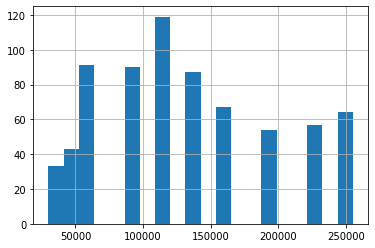

In [10]:
plotvar = 'Income integer'
selectvar = 'I have used the I-405 express toll lanes in the past three months:Please select all of the statements that apply to you.'
selectvaritem = 'I have used the I-405 express toll lanes in the past three months'
valuecountsnow = df[plotvar][df[selectvar] == selectvaritem].value_counts()
print(valuecountsnow)
#valuecounts = [valuecountsnow[i - 1] for i in valuecountsidx]
hist = df['Income integer'].hist(bins=20)

In [11]:
selectvar = 'Income integer'
dfig = df.groupby([selectvar]) # df, income groups
dfig.describe()

Response ID                                                 \
                     count         mean         std   min     25%     50%   
Income integer                                                              
30000.0               33.0   856.727273  531.159950  66.0  297.00   995.0   
42500.0               43.0   842.069767  501.306977  84.0  432.50   760.0   
62500.0               91.0   994.747253  520.178187  55.0  561.50   989.0   
87500.0               90.0   891.311111  523.453091  75.0  419.25   893.0   
112500.0             119.0   920.831933  513.145952  54.0  523.50   891.0   
137500.0              87.0   887.862069  537.128069  64.0  414.50   902.0   
162500.0              67.0   891.716418  495.282497  52.0  460.50   922.0   
187500.0              54.0  1042.000000  571.050241  50.0  699.00  1187.5   
225000.0              57.0   935.192982  508.444281  59.0  521.00   867.0   
255000.0              64.0   827.031250  567.254624  35.0  305.00   818.0   

                                Legacy Comments       ...  \
                    75%     max           count mean  ...   
Income integer                                        ...   
30000.0         1229.00  1813.0             0.0  NaN  ...   
42500.0         1262.00  1801.0             0.0  NaN  ...   
62500.0         1478.00  1823.0             0.0  NaN  ...   
87500.0         1350.75  1794.0             0.0  NaN  ...   
112500.0        1361.50  1811.0             0.0  NaN  ...   
137500.0        1341.00  1828.0             0.0  NaN  ...   
162500.0        1353.50  1781.0             0.0  NaN  ...   
187500.0        1538.75  1826.0             0.0  NaN  ...   
225000.0        1408.00  1816.0             0.0  NaN  ...   
255000.0        1325.75  1786.0             0.0  NaN  ...   

               They allow me to get more work done or earn more money:What do you like about the express toll lanes? (Please select all that apply.)  \
                                                                                                                                                 75%   
Income integer                                                                                                                                         
30000.0                                                       NaN                                                                                      
42500.0                                                       NaN                                                                                      
62500.0                                                       NaN                                                                                      
87500.0                                                       NaN                                                                                      
112500.0                                                      NaN                                                                                      
137500.0                                                      NaN                                                                                      
162500.0                                                      NaN                                                                                      
187500.0                                                      NaN                                                                                      
225000.0                                                      NaN                                                                                      
255000.0                                                      NaN                                                                                      

                   What is your home zip code?                              \
               max                       count          mean           std   
Income integer                                                               
30000.0 

# July 1, 2019

## Do people like the HOT lanes?

Yes    611
No      97
Name: Do you like having the option to use the express toll lanes when you need a faster trip?, dtype: int64


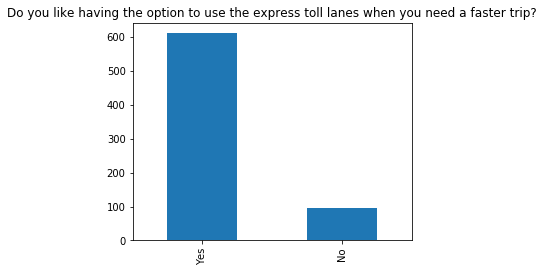

In [12]:
plotvar = 'Do you like having the option to use the express toll lanes when you need a faster trip?'
print(df[plotvar].value_counts())
ax = df[plotvar].value_counts().plot(kind='bar',
                                    figsize=(5,4),
                                    title=plotvar)

## What's the income distribution of survey respondents?

$100,000 to less than $125,000    119
$50,000 to less than $75,000       91
$75,000 to less than $100,000      90
$125,000 to less than $150,000     87
$150,000 to less than $175,000     67
$250,000 and over                  64
$200,000 to less than $250,000     57
$175,000 to less than $200,000     54
$35,000 to less than $50,000       43
Below $35,000                      33
Name: What is your total annual pre-tax household income?, dtype: int64


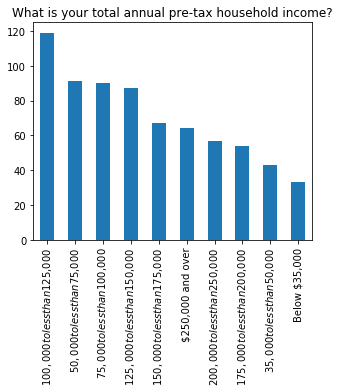

In [13]:
plotvar = 'What is your total annual pre-tax household income?'
selectvar = 'I have used the I-405 express toll lanes in the past three months:Please select all of the statements that apply to you.'
selectvaritem = 'I have used the I-405 express toll lanes in the past three months'
#valuecountsidx = [9,8,1,2,0,3,4,7,6,5]
valuecountsnow = df[plotvar][df[selectvar] == selectvaritem].value_counts()
print(valuecountsnow)
#valuecounts = [valuecountsnow[i - 1] for i in valuecountsidx]
ax = valuecountsnow.plot(kind='bar',figsize=(5,4),title=plotvar)

112500.0    119
62500.0      91
87500.0      90
137500.0     87
162500.0     67
255000.0     64
225000.0     57
187500.0     54
42500.0      43
30000.0      33
Name: Income integer, dtype: int64


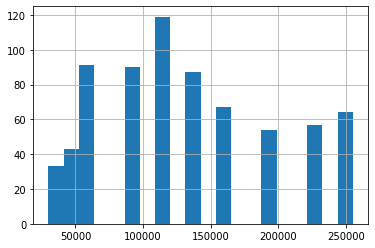

In [14]:
plotvar = 'Income integer'
selectvar = 'I have used the I-405 express toll lanes in the past three months:Please select all of the statements that apply to you.'
selectvaritem = 'I have used the I-405 express toll lanes in the past three months'
valuecountsnow = df[plotvar][df[selectvar] == selectvaritem].value_counts()
print(valuecountsnow)
#valuecounts = [valuecountsnow[i - 1] for i in valuecountsidx]
hist = df['Income integer'].hist(bins=20)

## What's the racial makeup of survey respondents?

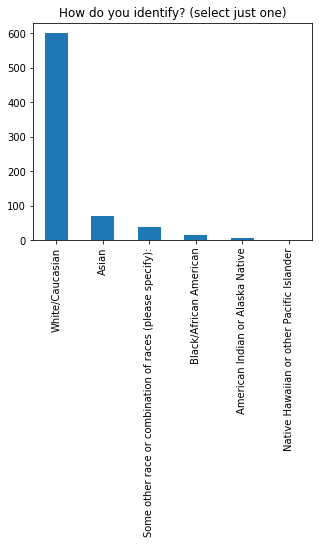

In [15]:
plotvar = 'How do you identify? (select just one)'
selectvar = 'I have used the I-405 express toll lanes in the past three months:Please select all of the statements that apply to you.'
selectvaritem = 'I have used the I-405 express toll lanes in the past three months'
ax = df[plotvar][df[selectvar] == selectvaritem].value_counts().plot(kind='bar',
                                                                     figsize=(5,4),title=plotvar)

## How does income affect frequency of use?

In [16]:
selectvar = 'In a typical week, about how many weekdays do you usually travel on parts of I-405 with express toll lanes during tolling hours?'
dfnwd = df.groupby([selectvar]) # df, number of weekdays
dfnwd.describe()

Response ID               \
                                                         count         mean   
In a typical week, about how many weekdays do y...                            
1 day                                                    343.0   903.516035   
2 days                                                    89.0  1035.202247   
3 days                                                    75.0   953.906667   
4 days                                                    34.0   844.294118   
5 days                                                   165.0   827.096970   

                                                                             \
                                                           std   min    25%   
In a typical week, about how many weekdays do y...                            
1 day                                               508.297881  52.0  447.5   
2 days                                              513.784934  81.0  613.0   
3 days                                              535.858220  35.0  451.0   
4 days                                              487.471058  67.0  414.0   
5 days                                              534.394611  50.0  323.0   

                                                                             \
                                                       50%      75%     max   
In a typical week, about how many weekdays do y...                            
1 day                                                883.0  1340.50  1828.0   
2 days                                              1044.0  1417.00  1816.0   
3 days                                               911.0  1454.00  1823.0   
4 days                                               818.5  1268.25  1704.0   
5 days                                               761.0  1296.00  1815.0   

                                                   Legacy Comments       ...  \
                                                             count mean  ...   
In a typical week, about how many weekdays do y...                       ...   
1 day                                                          0.0  NaN  ...   
2 days                                                         0.0  NaN  ...   
3 days                                                         0.0  NaN  ...   
4 days                                                         0.0  NaN  ...   
5 days                                                         0.0  NaN  ...   

                                                   What is your home zip code?  \
                                                                           75%   
In a typical week, about how many weekdays do y...                               
1 day                                                                  98256.5   
2 days                                                                 98203.0   
3 days                                                                 98203.0   
4 days                                                                 98245.5   
5 days                                                                 98201.0   

                                                            Income integer  \
                                                        max          count   
In a typical week, about how many weekdays do y...                           
1 day                                               99354.0          300.0   
2 days                                              98387.0           79.0   
3 days                                              98584.0           68.0   
4 days                                              98290.0           27.0   
5 days                                              99208.0          144.0   

                                                                   \
                                                             mean   
In a typical week, about how many weekdays do y...                  
1 day                 

In [17]:
plotvar = 'In a typical week, about how many weekdays do you usually travel on parts of I-405 with express toll lanes during tolling hours?'
print(df[plotvar].unique())
plotvar = 'Income integer'
print(df[plotvar].unique())

[nan '3 days' '5 days' '1 day' '4 days' '2 days']
[    nan 255000. 187500. 162500. 112500.  62500. 225000. 137500.  30000.
  87500.  42500.]


### With freq on the x-axis

In [18]:
plotvar = 'In a typical week, about how many weekdays do you usually travel on parts of I-405 with express toll lanes during tolling hours?'

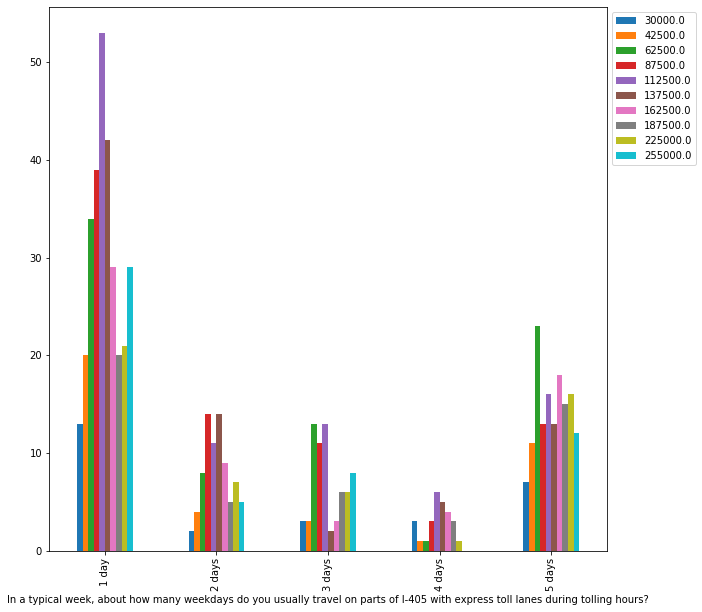

In [19]:
#print(dfig[plotvar].value_counts().unstack(0))
ax = dfig[plotvar].value_counts().unstack(0).plot(kind='bar',figsize=(10,10));
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

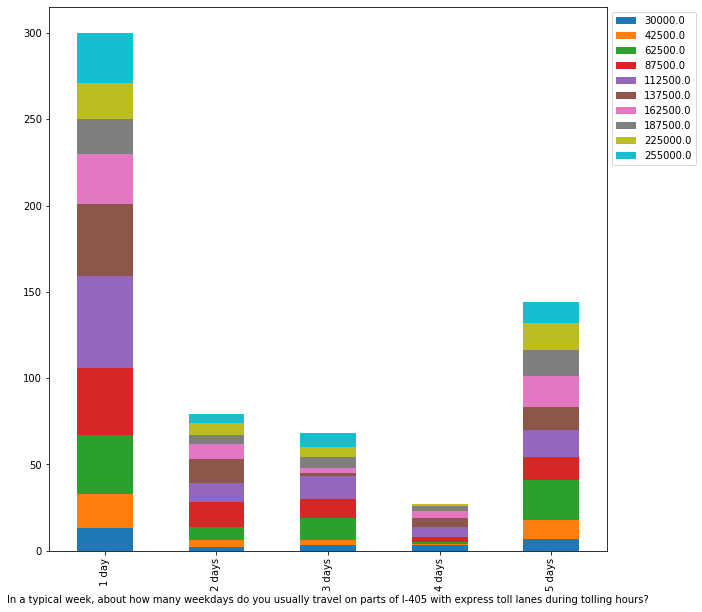

In [20]:
ax = dfig[plotvar].value_counts().unstack(0).plot(kind='bar',stacked=True,figsize=(10,10));
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

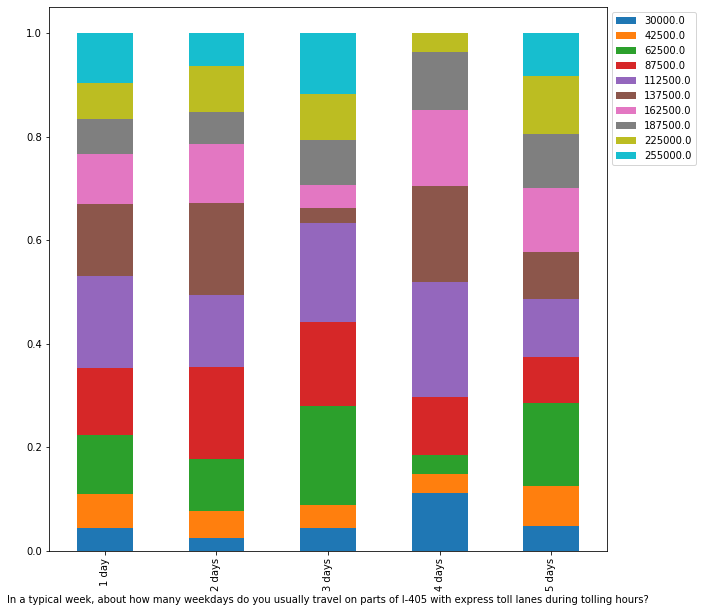

In [21]:
unstack = dfig[plotvar].value_counts().unstack(0)
ax = unstack.div(unstack.sum(axis=1), axis=0).plot(kind='bar',stacked=True,figsize=(10,10));
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1);

### With income on the x-axis

In [22]:
plotvar = 'Income integer'

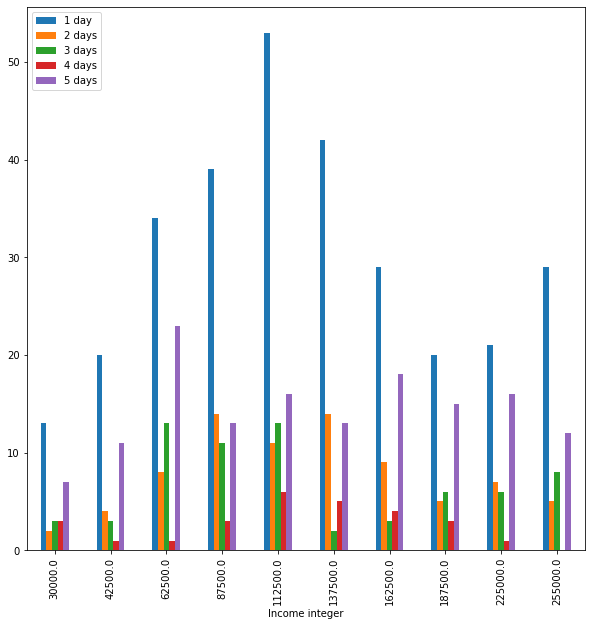

In [23]:
#print(dfnwd[plotvar].value_counts().unstack(0))
ax = dfnwd[plotvar].value_counts().unstack(0).plot(kind='bar',figsize=(10,10));
ax.legend(loc=2);

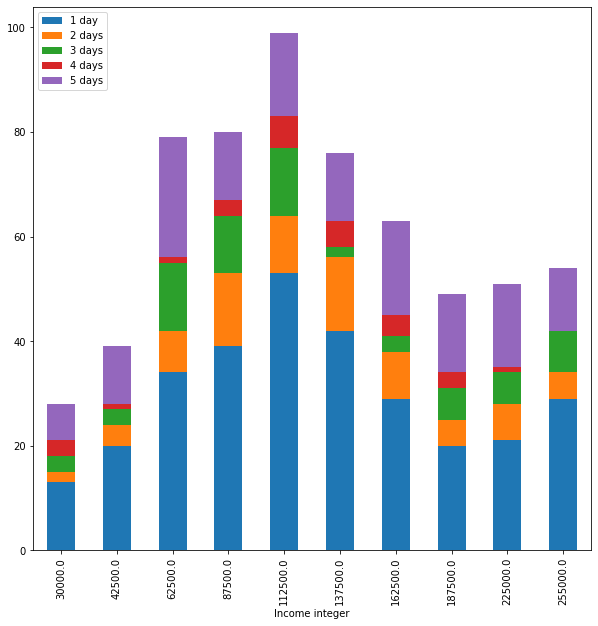

In [24]:
ax = dfnwd[plotvar].value_counts().unstack(0).plot(kind='bar',stacked=True,figsize=(10,10));
ax.legend(loc=2);

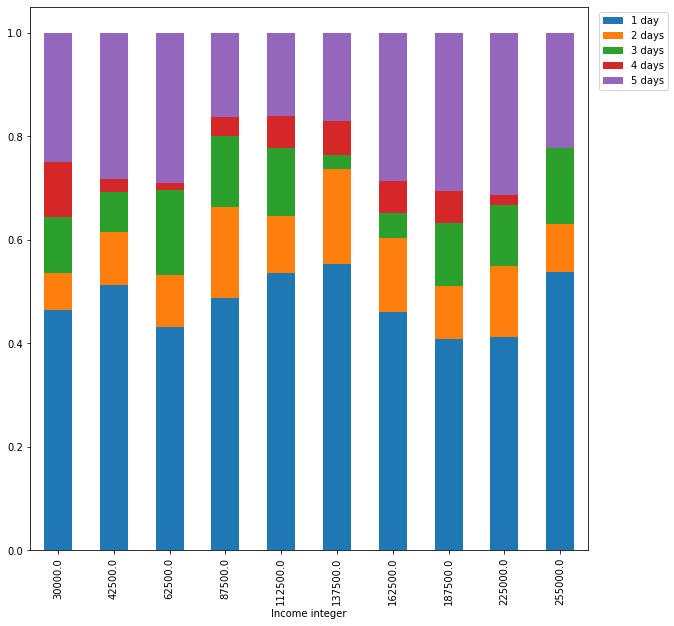

In [25]:
unstack = dfnwd[plotvar].value_counts().unstack(0)
ax = unstack.div(unstack.sum(axis=1), axis=0).plot(kind='bar',stacked=True,figsize=(10,10));
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1);

### Group by income+freq of use

In [ ]:
# var1 = 'Income integer'
# var2 = 'In a typical week, about how many weekdays do you usually travel on parts of I-405 with express toll lanes during tolling hours?'
# dfigwd = df.groupby([var1,var2]) # df, income groups, weekdays
# dfigwd.describe()

# July 2, 2019

## How does income affect the section of 405 traveled?

In [27]:
selectvars = ['I-405 between Renton and Bellevue:What sections of I-405 have you traveled on in the past 3 months? Please select all that apply.',
              'I-405 between Bellevue and Bothell:What sections of I-405 have you traveled on in the past 3 months? Please select all that apply.',
              'I-405 between Bothell and Lynnwood:What sections of I-405 have you traveled on in the past 3 months? Please select all that apply.',
              'None of these:What sections of I-405 have you traveled on in the past 3 months? Please select all that apply.']
selectvarsitem = ['I-405 between Renton and Bellevue',
              'I-405 between Bellevue and Bothell',
              'I-405 between Bothell and Lynnwood',
              'None of these']

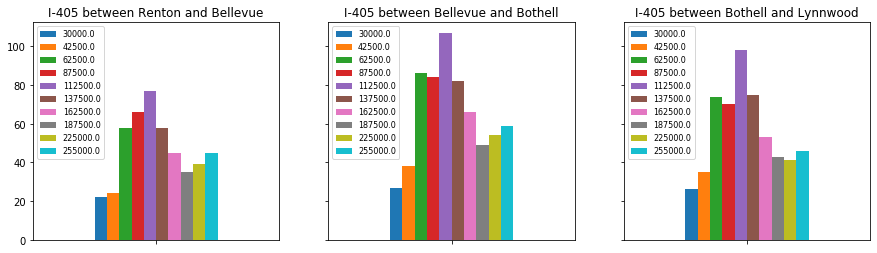

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4), sharey=True)
for plotidx in range(3):
    dfig[selectvars[plotidx]].value_counts().unstack(0).plot(kind='bar',ax=axes[plotidx]);
    axes[plotidx].legend(loc=2, prop={'size': 8})
    axes[plotidx].set_xlabel("")
    axes[plotidx].set_xticklabels("")
    axes[plotidx].set_title(selectvarsitem[plotidx])

Note that the above plots show the total # of responses for each section of 405 (i.e., some respondents go on more than 1 section of 405).

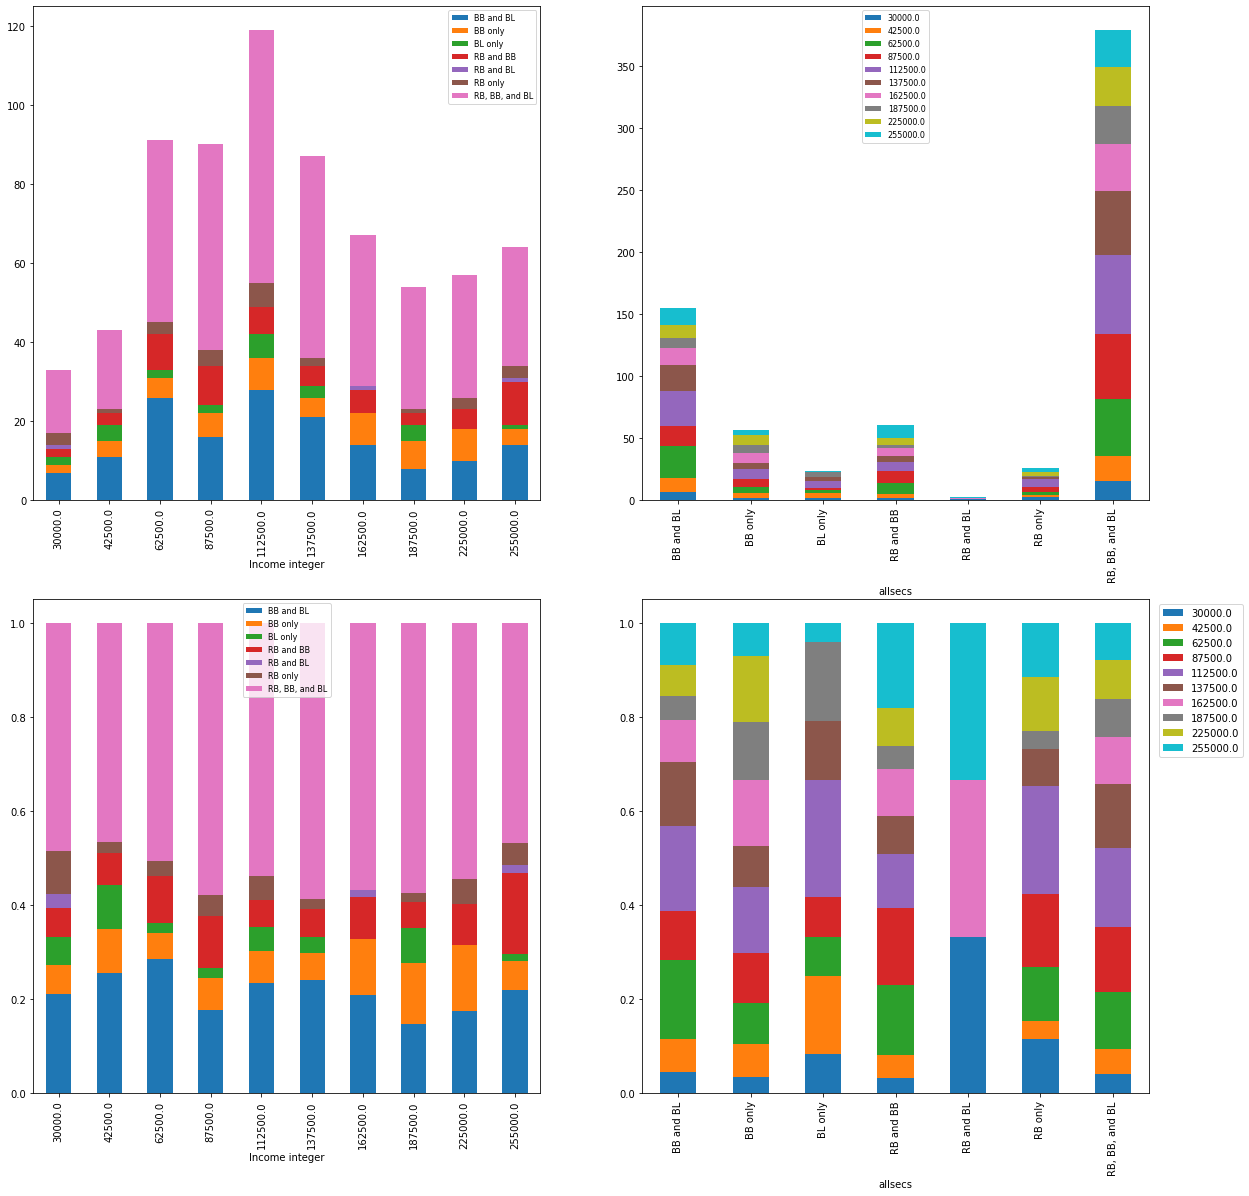

In [83]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

unstack1 = df.groupby(['Income integer', 'allsecs']).size().unstack()
unstack1.plot(kind='bar', stacked=True, ax=axes[0][0]);
axes[0][0].legend(loc=1, prop={'size': 8});

unstack2 = df.groupby(['allsecs', 'Income integer']).size().unstack()
unstack2.plot(kind='bar', stacked=True, ax=axes[0][1]);
axes[0][1].legend(loc=9, prop={'size': 8});

unstack1.div(unstack1.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=axes[1][0]);
axes[1][0].legend(loc=9, prop={'size': 8});

unstack2.div(unstack2.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=axes[1][1]);
axes[1][1].legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1);

In [ ]:
# selectvars = ['I-405 between Renton and Bellevue:What sections of I-405 have you traveled on in the past 3 months? Please select all that apply.',
#               'I-405 between Bellevue and Bothell:What sections of I-405 have you traveled on in the past 3 months? Please select all that apply.',
#               'I-405 between Bothell and Lynnwood:What sections of I-405 have you traveled on in the past 3 months? Please select all that apply.',
#               'None of these:What sections of I-405 have you traveled on in the past 3 months? Please select all that apply.']
# selectvarsab = ['I-405 between Renton and Bellevue',
#               'I-405 between Bellevue and Bothell',
#               'I-405 between Bothell and Lynnwood',
#               'None of these']

# dfig405secs = pd.concat([dfig[selectvars[0]].value_counts().unstack(0),
#  dfig[selectvars[1]].value_counts().unstack(0),
#  dfig[selectvars[2]].value_counts().unstack(0)])
# df405secsig = dfig405secs.transpose()

# ax = dfig405secs.plot(kind='bar',stacked=True,figsize=(10,10));
# ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1);

# ax = df405secsig.plot(kind='bar',stacked=True,figsize=(10,10));
# ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1);

# ax = df405secsig.div(df405secsig.sum(axis=1), axis=0).plot(kind='bar',stacked=True,figsize=(10,10));
# ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1);

## How does income affect the reason for travel?

In [90]:
selectvars = ['Travel to and/or from work:What are the most common reasons why you travel on I-405 during tolling hours? (Please select up toÂ\xa0three answers)',
              'Non-commute related travel for work:What are the most common reasons why you travel on I-405 during tolling hours? (Please select up toÂ\xa0three answers)',
              'Travel to and/or from school:What are the most common reasons why you travel on I-405 during tolling hours? (Please select up toÂ\xa0three answers)',
              'Personal errands or shopping:What are the most common reasons why you travel on I-405 during tolling hours? (Please select up toÂ\xa0three answers)',
              'Recreational activities:What are the most common reasons why you travel on I-405 during tolling hours? (Please select up toÂ\xa0three answers)',
              'Visit family or friends:What are the most common reasons why you travel on I-405 during tolling hours? (Please select up toÂ\xa0three answers)',
              'Medical needs:What are the most common reasons why you travel on I-405 during tolling hours? (Please select up toÂ\xa0three answers)']
selectvarsitem = ['Travel to and/or from work',
              'Non-commute related travel for work',
              'Travel to and/or from school',
              'Personal errands or shopping',
              'Recreational activities',
              'Visit family or friends',
              'Medical needs']

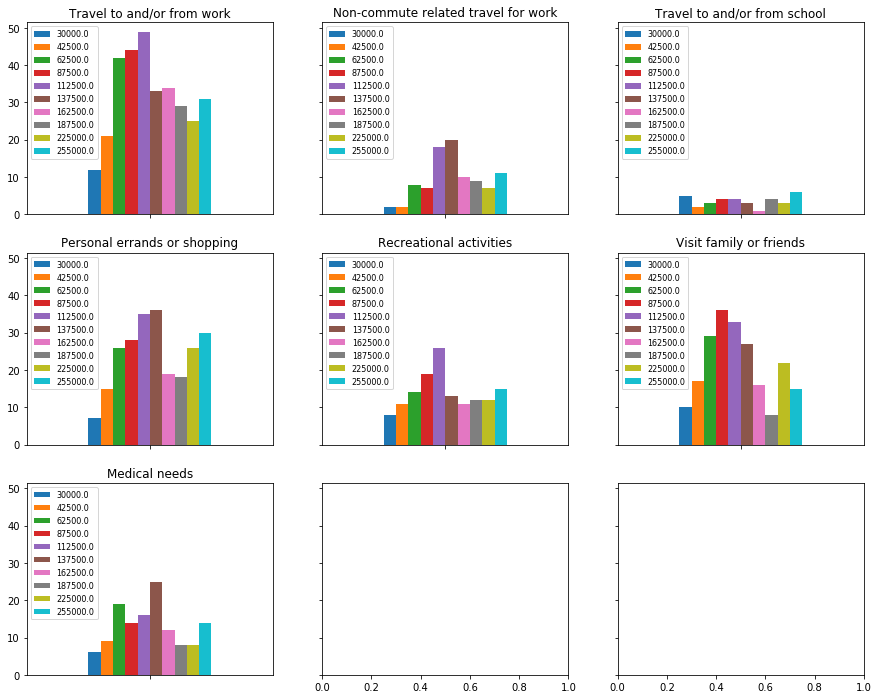

In [97]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12), sharey=True)
varnum = 0
for yplotidx in range(3):
    
    if yplotidx<2:
        xrangenow = 3
    else:
        xrangenow = 1
        
    for xplotidx in range(xrangenow):
        dfig[selectvars[varnum]].value_counts().unstack(0).plot(kind='bar',ax=axes[yplotidx][xplotidx])
        axes[yplotidx][xplotidx].legend(loc=2, prop={'size': 8})
        axes[yplotidx][xplotidx].set_xlabel("")
        axes[yplotidx][xplotidx].set_xticklabels("")
        axes[yplotidx][xplotidx].set_title(selectvarsitem[varnum])
        varnum = varnum + 1

Note that the above plots show the total # of responses for each travel reason (i.e., some respondents have more than 1 travel reason).

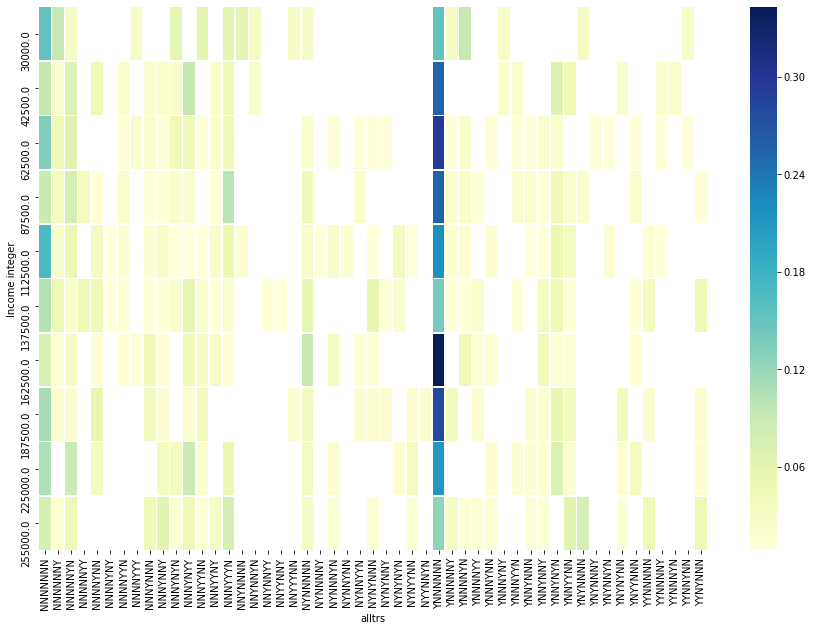

In [138]:
unstack = df.groupby(['Income integer', 'alltrs']).size().unstack()
plt.figure(figsize=(15,10));
sns.heatmap(unstack.div(test.sum(axis=1),axis=0),cmap='YlGnBu', linewidths=0.5);

Order: 1.) Travel to and/or from work, 2.) Non-commute related travel for work, 3.) Travel to and/or from school,  
4.) Personal errands or shopping, 5.) Recreational activities, 6.) Visit family or friends, 7.) Medical needs

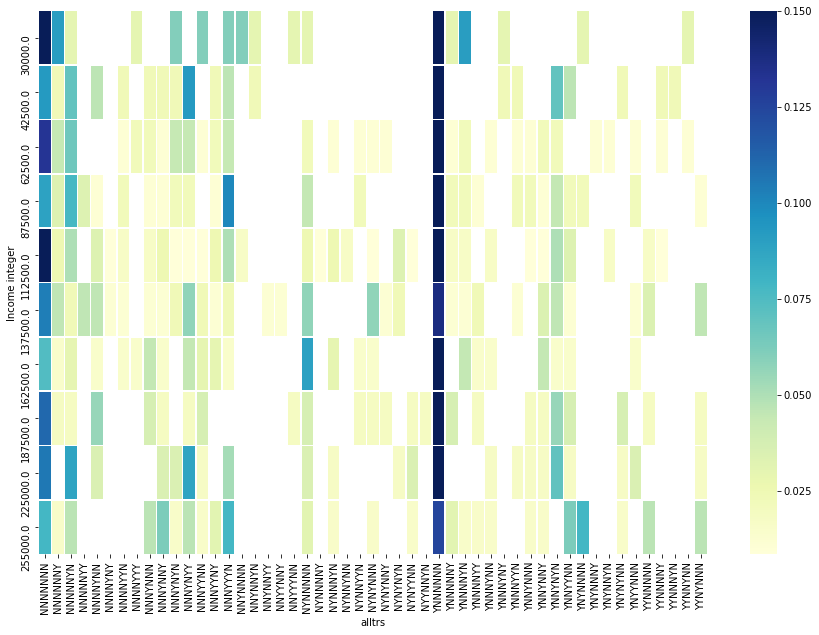

In [141]:
unstack = df.groupby(['Income integer', 'alltrs']).size().unstack()
plt.figure(figsize=(15,10));
sns.heatmap(unstack.div(test.sum(axis=1),axis=0),cmap='YlGnBu', linewidths=0.5, vmax=0.15);

Order: 1.) Travel to and/or from work, 2.) Non-commute related travel for work, 3.) Travel to and/or from school,  
4.) Personal errands or shopping, 5.) Recreational activities, 6.) Visit family or friends, 7.) Medical needs